In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# **** read data

In [2]:
## read data
train_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
sample_submission = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [3]:
print(train_data.shape)
print(test_data.shape)

(1460, 81)
(1459, 80)


In [4]:
y = train_data['SalePrice']
y.shape

(1460,)

In [5]:
describe_data = train_data.describe()
describe_data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
##show data
train_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


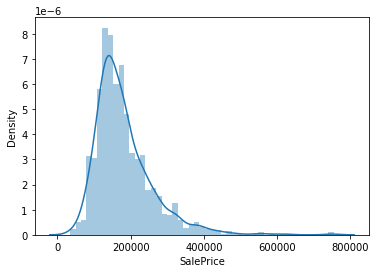

In [7]:
##histogram
##draw the oytput "y" 

sns.distplot(y);

# 1.**Draw the Relationship between the numerical variable input and autput

(1460,)


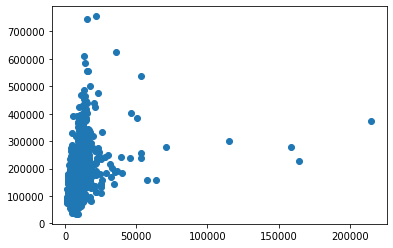

In [8]:
##Draw the relationship between "LotArea" and the output
z = train_data['LotArea']
print(z.shape)
plt.scatter(z,y)

(1460,)


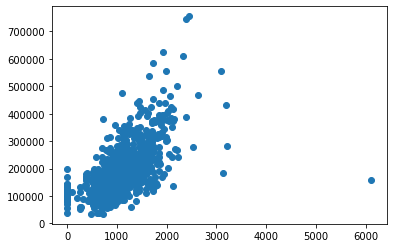

In [9]:
##Draw the relationship between "TotalBsmtSF" and the output
p = train_data['TotalBsmtSF']
print(z.shape)
plt.scatter(p,y)


(1460,)


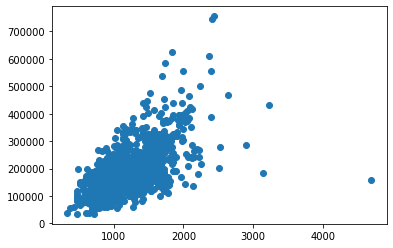

In [10]:
##Draw the relationship between "1stFlrSF" and the output
c = train_data['1stFlrSF']
print(z.shape)
plt.scatter(c,y)

(1460,)


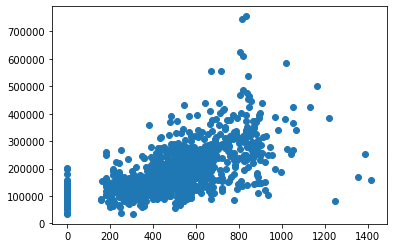

In [11]:
##Draw the relationship between "GarageArea" and the output
u = train_data['GarageArea']
print(z.shape)
plt.scatter(u,y)

In [12]:
categorical_features = train_data.select_dtypes([object]).columns
numerical_features = train_data.select_dtypes([int, float]).columns

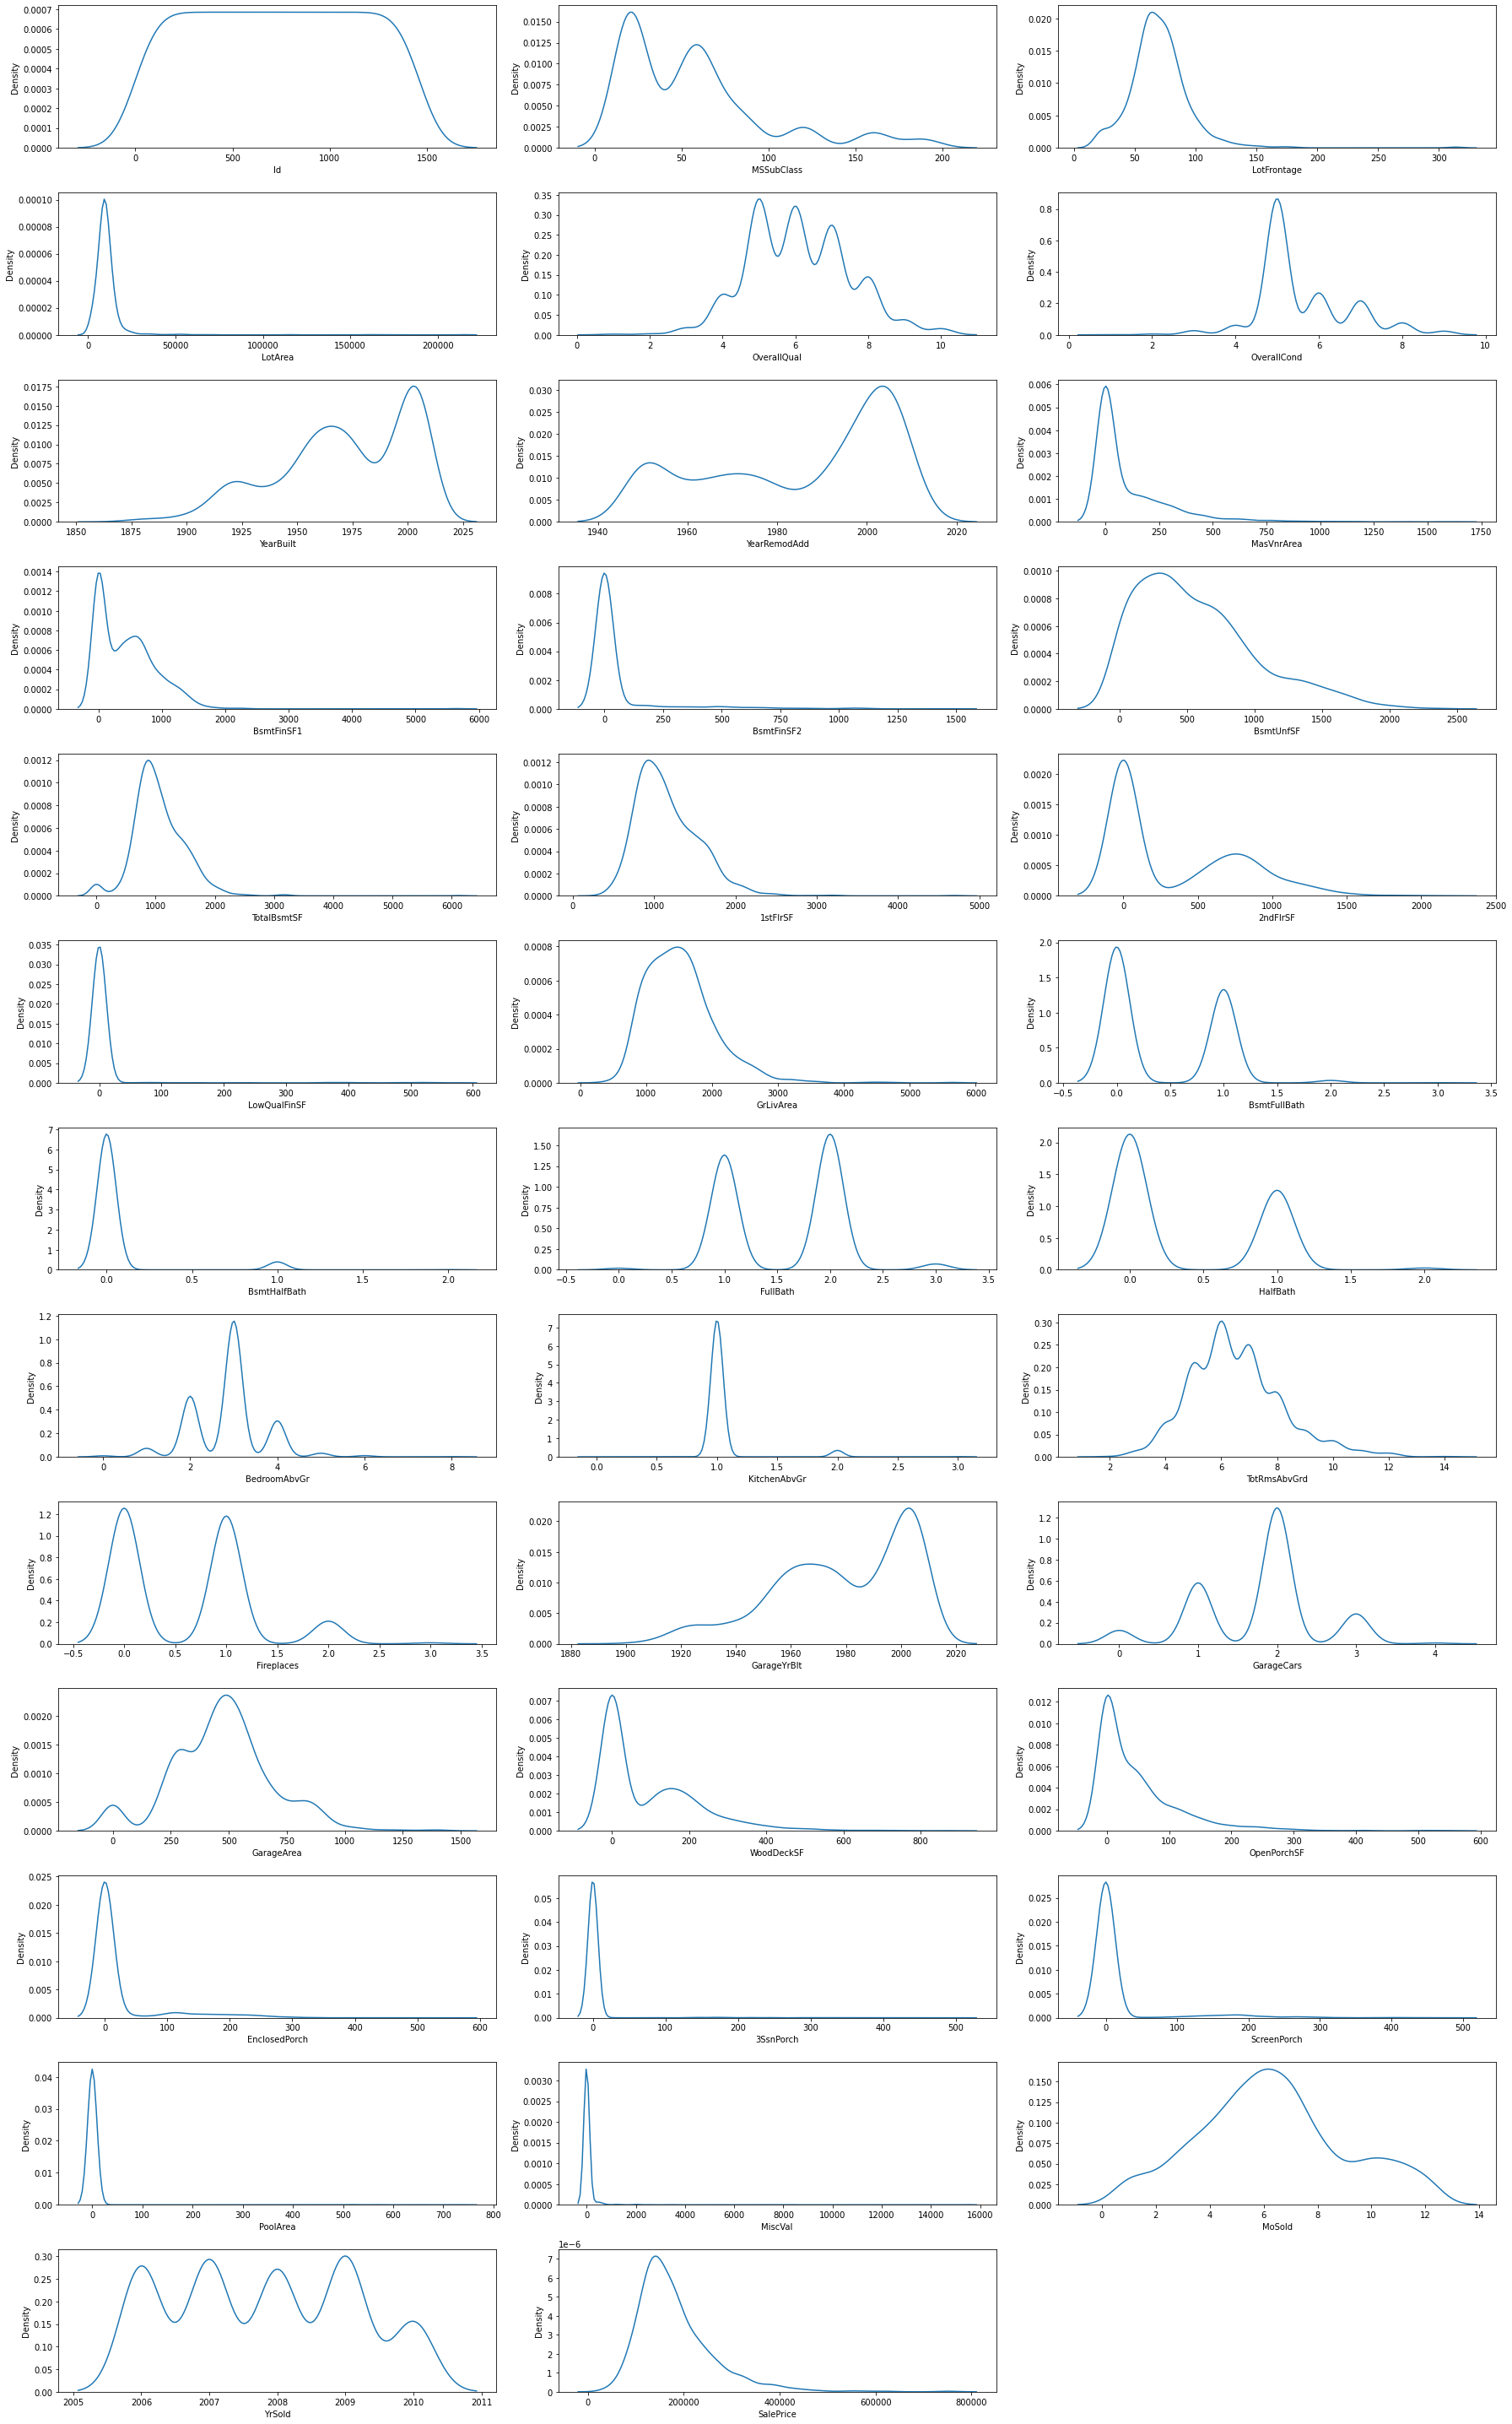

In [13]:
fig = plt.figure(figsize=(25,40)) #figure size
o = 13  # number of rows
q = 3  # number of columns
w = 1  # initialize plot counter

for feat in numerical_features:
    plt.subplot(o, q, w)
    sns.kdeplot(x=train_data[feat])
    w+=1
    
plt.tight_layout()
plt.show()

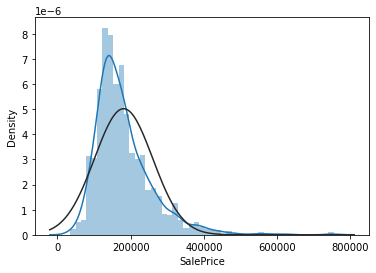

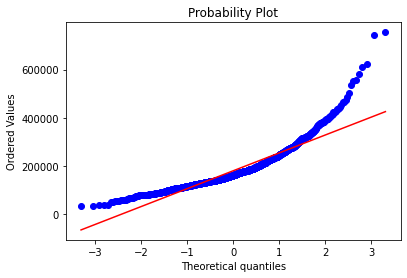

In [14]:
#histogram and normal probability plot
sns.distplot(y, fit=norm);
fig = plt.figure()
res = stats.probplot(y, plot=plt)

In [15]:
y  = np.log(y)

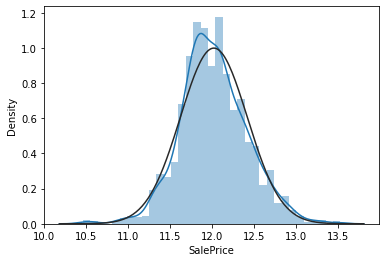

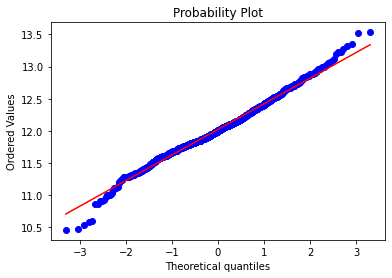

In [16]:
##transformed histogram and normal probability plot
sns.distplot(y, fit=norm);
fig = plt.figure()
res = stats.probplot(y, plot=plt)

 # ********missing data 

In [17]:
## delaing measing data in train_data
train_data.isna().sum()[train_data.isna().sum()>0]
train_data.fillna('Unknown',inplace=True)
print(train_data.shape)

(1460, 81)


In [18]:
## delaing measing data in test_data
test_data.isna().sum()[test_data.isna().sum()>0]
test_data.fillna('Unknown',inplace=True)
print(test_data.shape)

(1459, 80)


# ****convert data from string to number

In [19]:

oe=OrdinalEncoder()
for col in train_data:
    train_data[col]=oe.fit_transform(np.asarray(train_data[col].astype('str')).reshape(-1,1))
for col in test_data:
    test_data[col]=oe.fit_transform(np.asarray(test_data[col].astype('str')).reshape(-1,1))

In [20]:
print(train_data.shape)
print(test_data.shape)
print(y.shape)

(1460, 81)
(1459, 80)
(1460,)


In [21]:
test_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.0,5.0,2.0,95.0,187.0,1.0,2.0,3.0,3.0,0.0,...,12.0,0.0,2.0,2.0,3.0,0.0,8.0,4.0,9.0,4.0
1,1.0,5.0,3.0,96.0,374.0,1.0,2.0,0.0,3.0,0.0,...,0.0,0.0,2.0,4.0,0.0,3.0,8.0,4.0,9.0,4.0
2,2.0,10.0,3.0,89.0,357.0,1.0,2.0,0.0,3.0,0.0,...,0.0,0.0,2.0,2.0,3.0,0.0,5.0,4.0,9.0,4.0
3,3.0,10.0,3.0,93.0,1103.0,1.0,2.0,0.0,3.0,0.0,...,0.0,0.0,2.0,4.0,3.0,0.0,8.0,4.0,9.0,4.0
4,4.0,0.0,3.0,58.0,631.0,1.0,2.0,0.0,1.0,0.0,...,21.0,0.0,2.0,4.0,3.0,0.0,0.0,4.0,9.0,4.0
5,5.0,10.0,3.0,90.0,0.0,1.0,2.0,0.0,3.0,0.0,...,0.0,0.0,2.0,4.0,3.0,0.0,6.0,4.0,9.0,4.0
6,6.0,5.0,3.0,115.0,829.0,1.0,2.0,0.0,3.0,0.0,...,0.0,0.0,2.0,0.0,2.0,18.0,5.0,4.0,9.0,4.0
7,7.0,10.0,3.0,78.0,895.0,1.0,2.0,0.0,3.0,0.0,...,0.0,0.0,2.0,4.0,3.0,0.0,7.0,4.0,9.0,4.0
8,8.0,5.0,3.0,100.0,25.0,1.0,2.0,3.0,3.0,0.0,...,0.0,0.0,2.0,4.0,3.0,0.0,4.0,4.0,9.0,4.0
9,9.0,5.0,3.0,85.0,894.0,1.0,2.0,3.0,3.0,0.0,...,0.0,0.0,2.0,2.0,3.0,0.0,6.0,4.0,9.0,4.0


In [22]:
train_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.0,9.0,3.0,75.0,859.0,1.0,2.0,3.0,3.0,0.0,...,0.0,3.0,4.0,4.0,0.0,4.0,2.0,8.0,4.0,343.0
1,572.0,4.0,3.0,90.0,1030.0,1.0,2.0,3.0,3.0,0.0,...,0.0,3.0,4.0,4.0,0.0,7.0,1.0,8.0,4.0,270.0
2,683.0,9.0,3.0,78.0,161.0,1.0,2.0,0.0,3.0,0.0,...,0.0,3.0,4.0,4.0,0.0,11.0,2.0,8.0,4.0,373.0
3,794.0,10.0,3.0,70.0,1021.0,1.0,2.0,0.0,3.0,0.0,...,0.0,3.0,4.0,4.0,0.0,4.0,0.0,8.0,0.0,125.0
4,905.0,9.0,3.0,94.0,386.0,1.0,2.0,0.0,3.0,0.0,...,0.0,3.0,4.0,4.0,0.0,3.0,2.0,8.0,4.0,425.0
5,1016.0,8.0,3.0,95.0,376.0,1.0,2.0,0.0,3.0,0.0,...,0.0,3.0,2.0,2.0,18.0,1.0,3.0,8.0,4.0,134.0
6,1127.0,4.0,3.0,85.0,11.0,1.0,2.0,3.0,3.0,0.0,...,0.0,3.0,4.0,4.0,0.0,10.0,1.0,8.0,4.0,504.0
7,1238.0,9.0,3.0,110.0,52.0,1.0,2.0,0.0,3.0,0.0,...,0.0,3.0,4.0,2.0,8.0,2.0,3.0,8.0,4.0,321.0
8,1349.0,8.0,4.0,61.0,668.0,1.0,2.0,3.0,3.0,0.0,...,0.0,3.0,4.0,4.0,0.0,6.0,2.0,8.0,0.0,82.0
9,1.0,3.0,3.0,60.0,754.0,1.0,2.0,3.0,3.0,0.0,...,0.0,3.0,4.0,4.0,0.0,0.0,2.0,8.0,4.0,44.0


In [23]:
## spliting data to X and y


X = train_data.drop(columns = "SalePrice")
print(X.shape)
print(y.shape)
print(test_data.shape)

(1460, 80)
(1460,)
(1459, 80)


# ****Scaling data 

In [24]:
## Scaling Model 
## scale to train_data
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X.shape)


(1460, 80)


# *****Spliting data to X_train, y_train,X_test and y_test

In [25]:
## spliting data into X_train , y_train,X_test,y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(978, 80)
(978,)
(482, 80)
(482,)


# ****apply the RandomForestRegressor Algorithm

In [27]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=100,max_depth=5, random_state=44,min_samples_split=5,min_samples_leaf=5
                                                ,n_jobs=-1 )
                                                  
RandomForestRegressorModel.fit(X_train, y_train)


RandomForestRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                      n_jobs=-1, random_state=44)

In [28]:
#Calculating Details
print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(X_test, y_test))


Random Forest Regressor Train Score is :  0.8842644546750895
Random Forest Regressor Test Score is :  0.8004118839671198


In [29]:
#Calculating Prediction
y_pred =  RandomForestRegressorModel.predict(X_test)

print('Predicted Value for RandomForestRegressorModelis : ' , y_pred)

print(y_pred.shape)

Predicted Value for RandomForestRegressorModelis :  [11.68516114 11.83619081 12.51015716 11.75597977 12.03590491 11.86517544
 11.98991343 12.13344428 11.92297545 12.23172537 12.60901533 11.80197418
 11.70976815 11.96417425 11.72991682 12.61870303 11.62332729 11.80267573
 11.91837249 12.10469676 11.98189249 11.54801242 11.80537651 11.72009976
 11.56476121 11.84796848 11.76440638 12.46665902 11.73280865 11.74353729
 12.12558697 11.98449486 12.05210718 11.52469343 11.99804672 11.90176454
 12.08808681 11.84991072 11.87626078 12.54039679 12.10477676 12.0711267
 11.86399882 11.83749466 12.12044468 12.02559367 11.72258204 12.25166913
 11.95579041 12.29636105 12.15640224 11.89834265 12.58302763 12.18653327
 11.98357196 12.23729455 11.57221335 12.06280651 12.13625823 11.80058249
 12.09441395 12.02725742 12.18590064 12.095824   12.30031134 12.10261816
 12.17364516 11.6297225  11.99207875 11.79969467 12.45484716 11.85717994
 12.0386436  11.65208816 12.44115022 11.61850007 12.81660428 12.28043322


In [30]:
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
print("MAEValue is :" ,MAEValue)

MAEValue is : 0.12050527983841613


In [31]:
MSEValue= mean_squared_error(y_test, y_pred, multioutput='raw_values')
print("MSEValue is : " , MSEValue)

MSEValue is :  [0.03238445]


# ****knowing the best features 

In [32]:
## Knowing the best features 
sel = SelectFromModel(RandomForestRegressor( )) 
sel.fit(X,y)
selected_features = sel.transform(X)
sel.get_support()


array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False,  True,  True,  True, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [33]:
feature_importance =  RandomForestRegressorModel.feature_importances_
feature_importance

array([2.58744373e-04, 1.56284368e-03, 3.29554506e-03, 5.87939421e-03,
       2.11115620e-03, 0.00000000e+00, 0.00000000e+00, 1.76844032e-03,
       6.37726901e-05, 0.00000000e+00, 1.90243828e-04, 7.91119606e-04,
       2.25841272e-03, 0.00000000e+00, 0.00000000e+00, 6.33073615e-04,
       2.99459836e-04, 3.50552244e-01, 3.24285865e-03, 1.78963213e-01,
       2.40529101e-02, 1.66968542e-04, 0.00000000e+00, 5.66188051e-04,
       1.06252162e-04, 2.64731982e-04, 7.63103621e-04, 7.20259864e-02,
       3.25577931e-03, 9.10830149e-04, 1.60214536e-02, 1.94505218e-04,
       7.09128166e-04, 1.27967153e-03, 3.29900541e-03, 0.00000000e+00,
       0.00000000e+00, 1.20808154e-03, 6.63089961e-03, 8.98476062e-05,
       3.70537201e-04, 8.80886853e-03, 3.43464274e-05, 9.03930319e-03,
       4.43406001e-03, 0.00000000e+00, 5.97806845e-02, 4.13170171e-04,
       0.00000000e+00, 9.55470721e-03, 1.05264464e-03, 5.95276150e-03,
       2.63239225e-04, 1.18000045e-02, 6.15189401e-03, 0.00000000e+00,
      

# ****Make Predictions

In [34]:
test_preds = RandomForestRegressorModel.predict(test_data)

In [35]:
print(test_preds.shape)

(1459,)


In [36]:
print(test_data)

          Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0        0.0         5.0       2.0         95.0    187.0     1.0    2.0   
1        1.0         5.0       3.0         96.0    374.0     1.0    2.0   
2        2.0        10.0       3.0         89.0    357.0     1.0    2.0   
3        3.0        10.0       3.0         93.0   1103.0     1.0    2.0   
4        4.0         0.0       3.0         58.0    631.0     1.0    2.0   
...      ...         ...       ...          ...      ...     ...    ...   
1454  1454.0         2.0       4.0         39.0    491.0     1.0    2.0   
1455  1455.0         2.0       4.0         39.0    488.0     1.0    2.0   
1456  1456.0         5.0       3.0         36.0    500.0     1.0    2.0   
1457  1457.0        14.0       3.0         77.0     57.0     1.0    2.0   
1458  1458.0        10.0       3.0         89.0   1052.0     1.0    2.0   

      LotShape  LandContour  Utilities  ...  ScreenPorch  PoolArea  PoolQC  \
0          3.0       

# ****Submission

In [37]:
sample_submission ['SalePrice'] = test_preds

In [38]:
sample_submission.head(10)

,Id,SalePrice
0,1461,12.746689
1,1462,12.744844
2,1463,12.740990
3,1464,12.736317
4,1465,12.729594
5,1466,12.739037
6,1467,12.745483
7,1468,12.734797
8,1469,12.754077
9,1470,12.748366


In [39]:
sample_submission.to_csv('submission.csv') # convert data frame into csv file
